In [1]:
import sqlite3
import pandas as pd
from data_generator.statistics import StatsCalculator
from data_generator.charts import ChartBuilder
from plotnine import *

In [2]:
def make_db_connection():
    conn = sqlite3.connect('cfmm.db')
    return conn

def execute_query_to_dataframe(sql):
    conn = sqlite3.connect('cfmm.db')
    df = pd.read_sql_query(sql, conn)
    conn.close()
    return df

In [3]:
sql = """
    SELECT * FROM articles a
    LEFT JOIN bias_rating b
    on a.article_url = b.article_url
"""
query_data = execute_query_to_dataframe(sql)

In [4]:
query_params = {
    'selected_publisher': 'Bbc',
    'compared_publishers': set(query_data['publisher']) - set(['Bbc'])
}

In [5]:
stats = StatsCalculator(query_params, query_data)
chart = ChartBuilder()

/home/pdonato/.conda/envs/armas/lib/python3.8/site-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 4 values. 6 were requested from it.
/home/pdonato/.conda/envs/armas/lib/python3.8/site-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 4 values. 6 were requested from it.


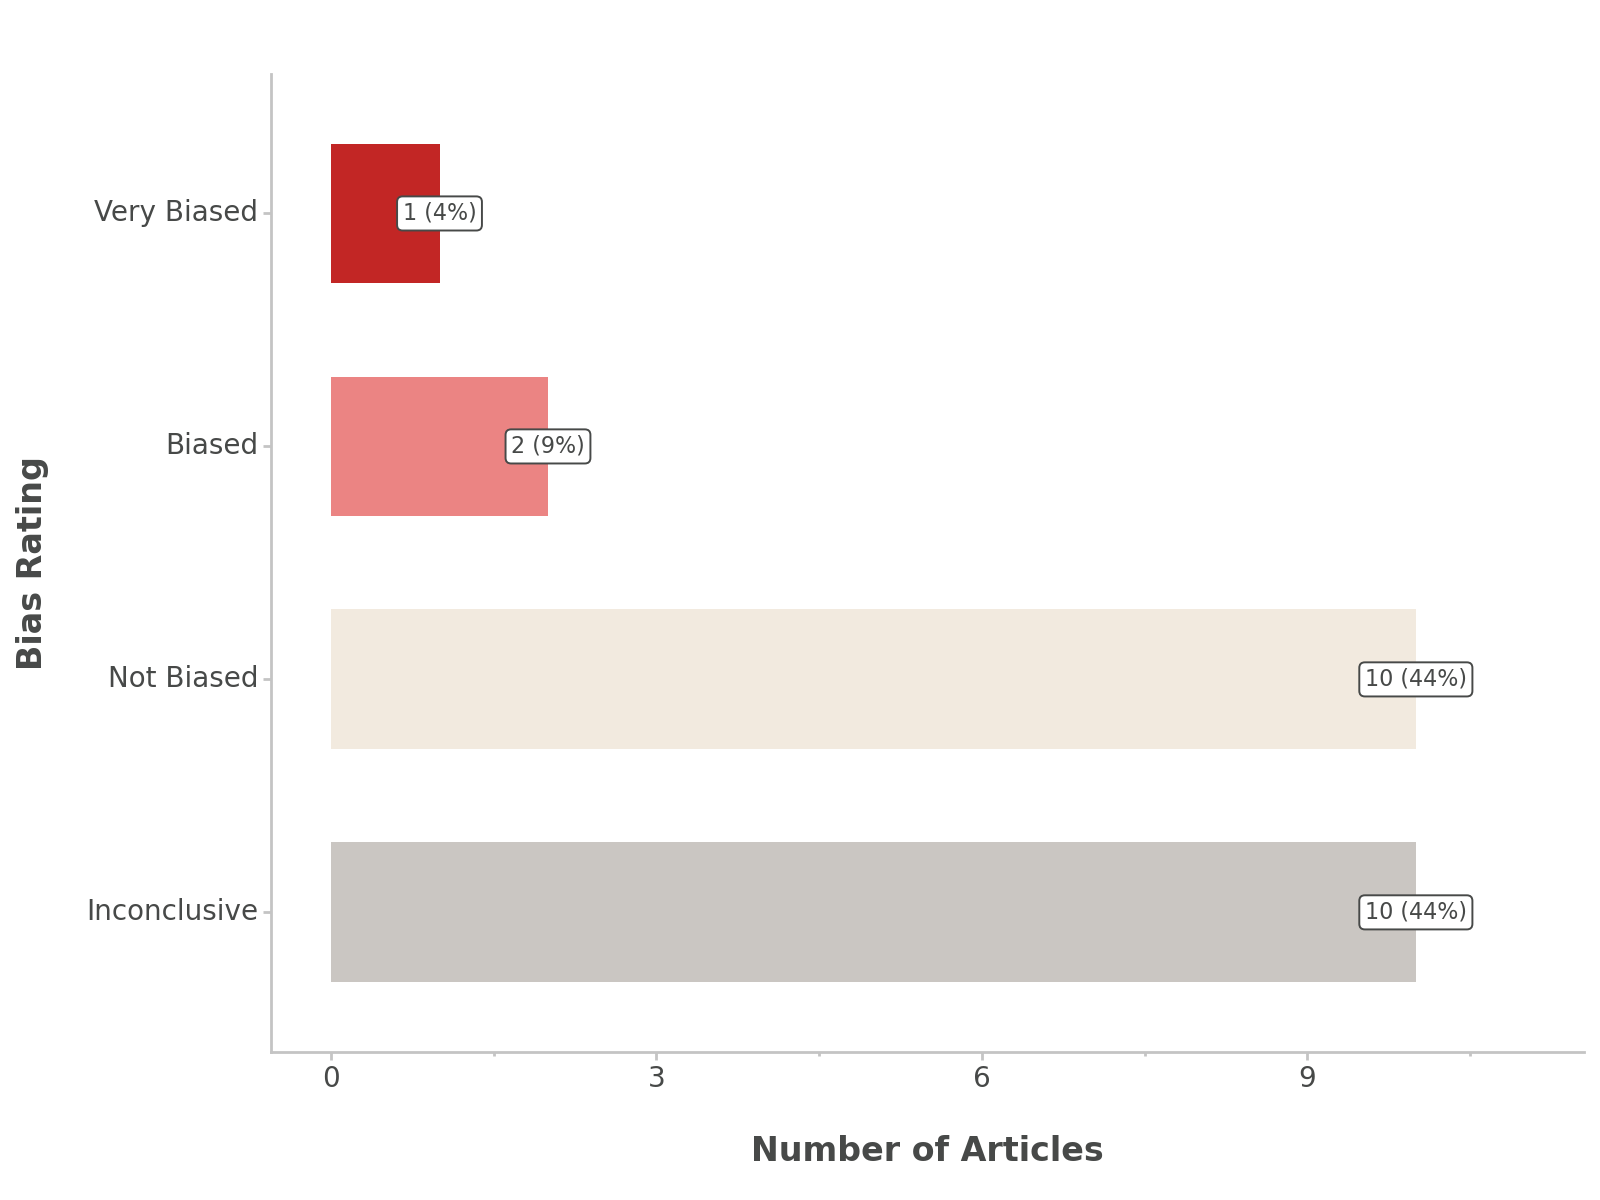

<Figure Size: (800 x 600)>

In [6]:
c1 = 'bias_rating'
data = stats.calc_1D_stats(c1)
chart.build_bar_chart(data, c1)

/home/pdonato/.conda/envs/armas/lib/python3.8/site-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 5 values. 6 were requested from it.
/home/pdonato/.conda/envs/armas/lib/python3.8/site-packages/plotnine/scales/scale_manual.py:45: PlotnineWarning: The palette of scale_fill_manual can return a maximum of 5 values. 6 were requested from it.


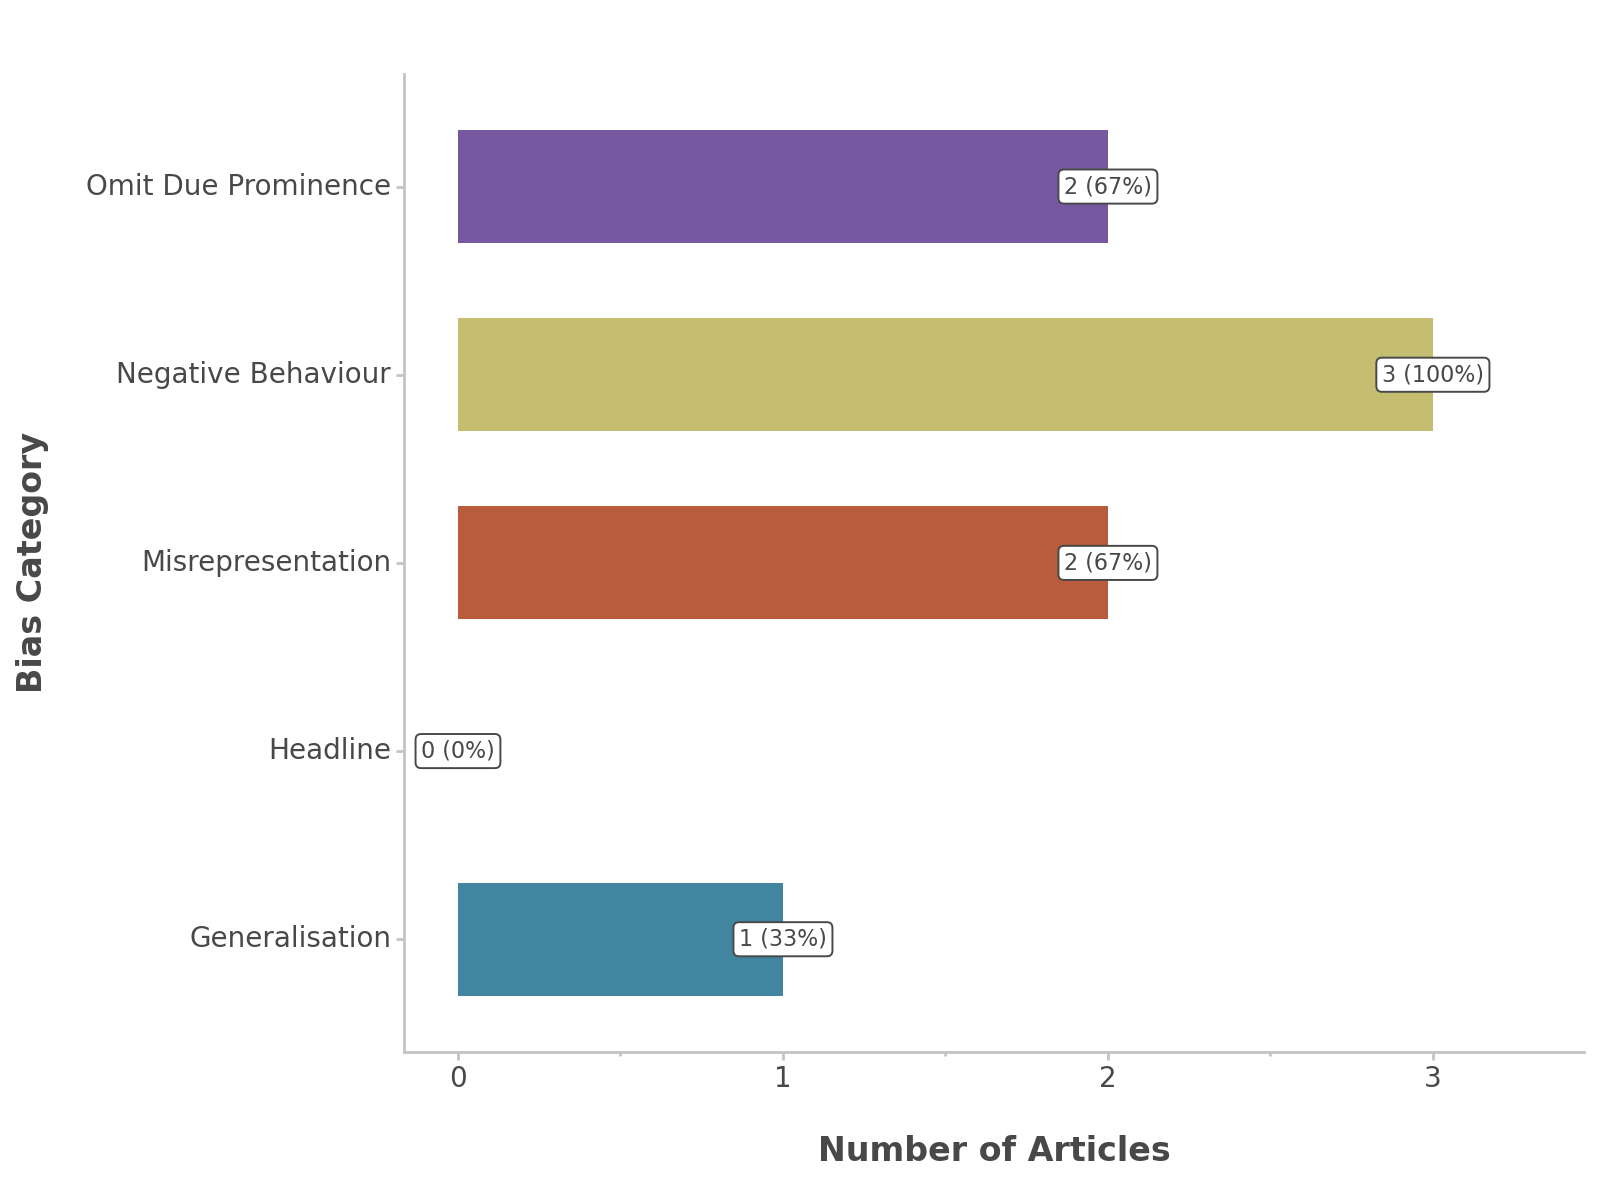

<Figure Size: (800 x 600)>

In [7]:
c1 = 'bias_category'
data = stats.calc_1D_biased_stats(c1)
chart.build_bar_chart(data, c1)

/home/pdonato/_CfMM/cfmm-app/data_generator/statistics.py:158: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.


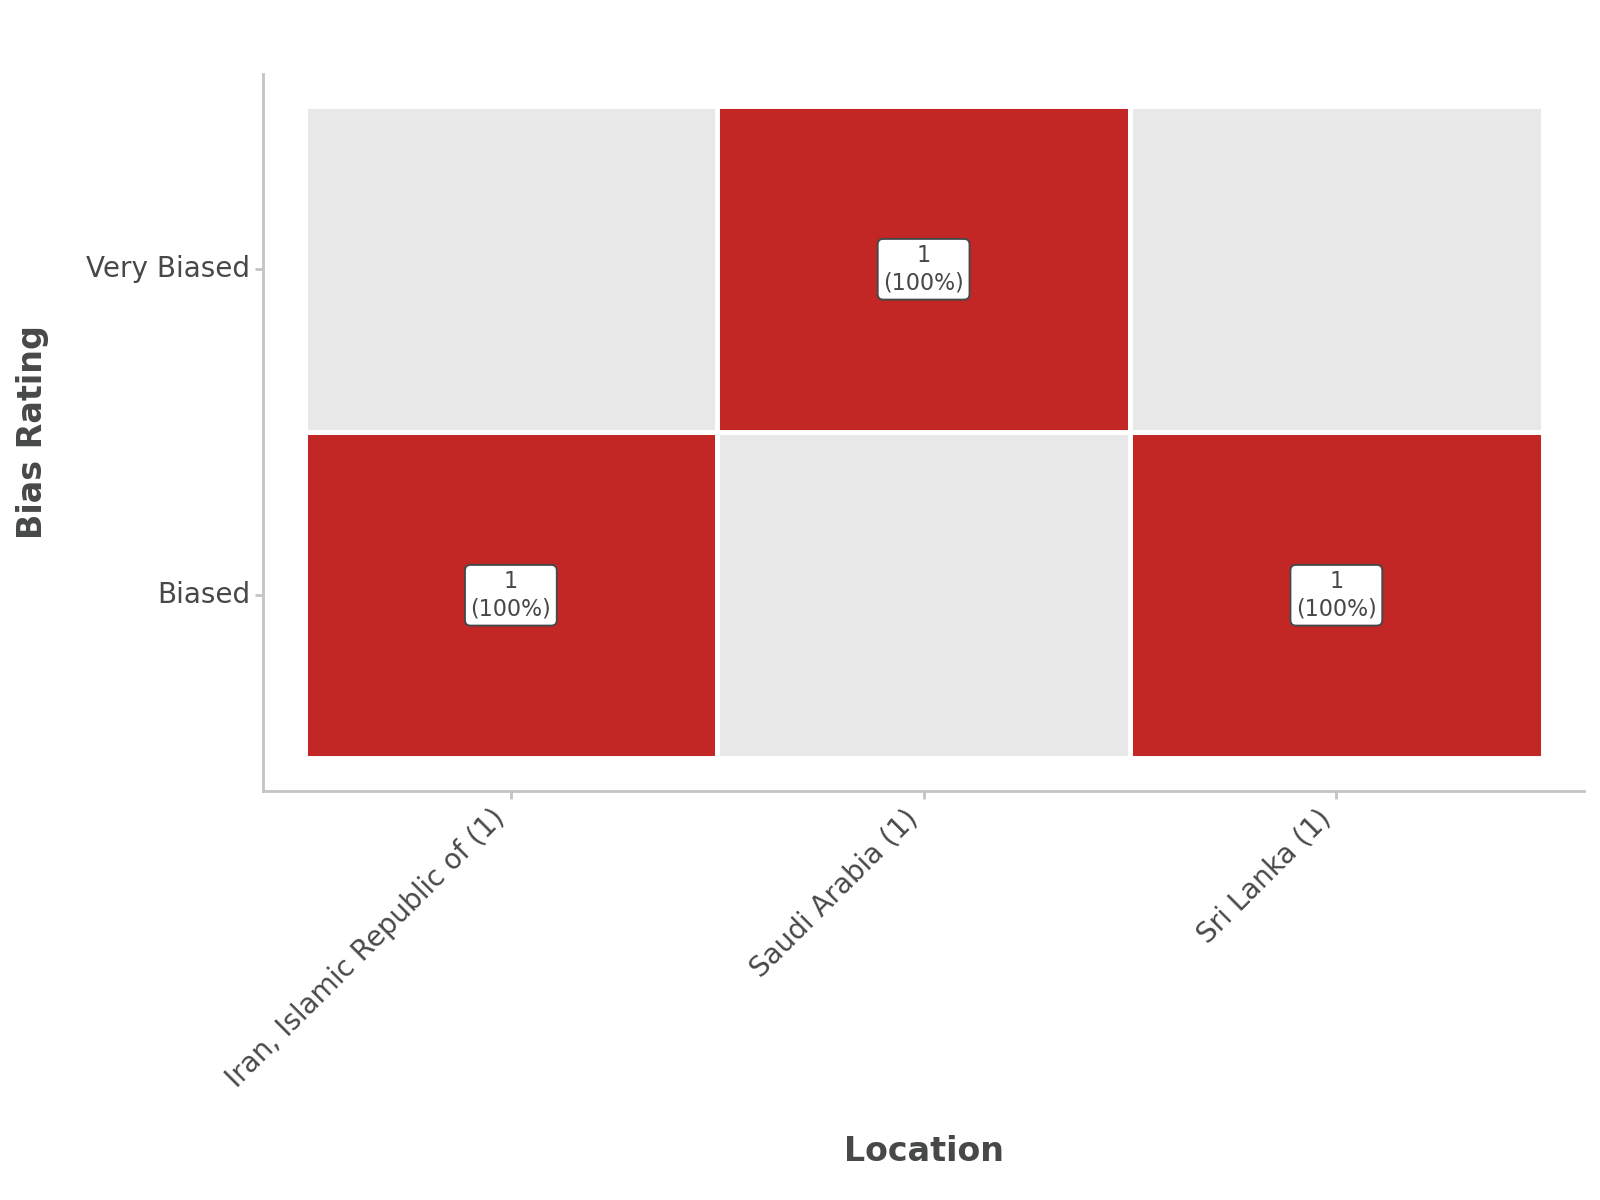

<Figure Size: (800 x 600)>

In [8]:
c1 = 'location'
c2 = 'bias_rating'
data = stats.calc_2D_biased_stats(c1, c2)
chart.build_heatmap_chart(data, c1, c2)

/home/pdonato/_CfMM/cfmm-app/data_generator/statistics.py:158: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.


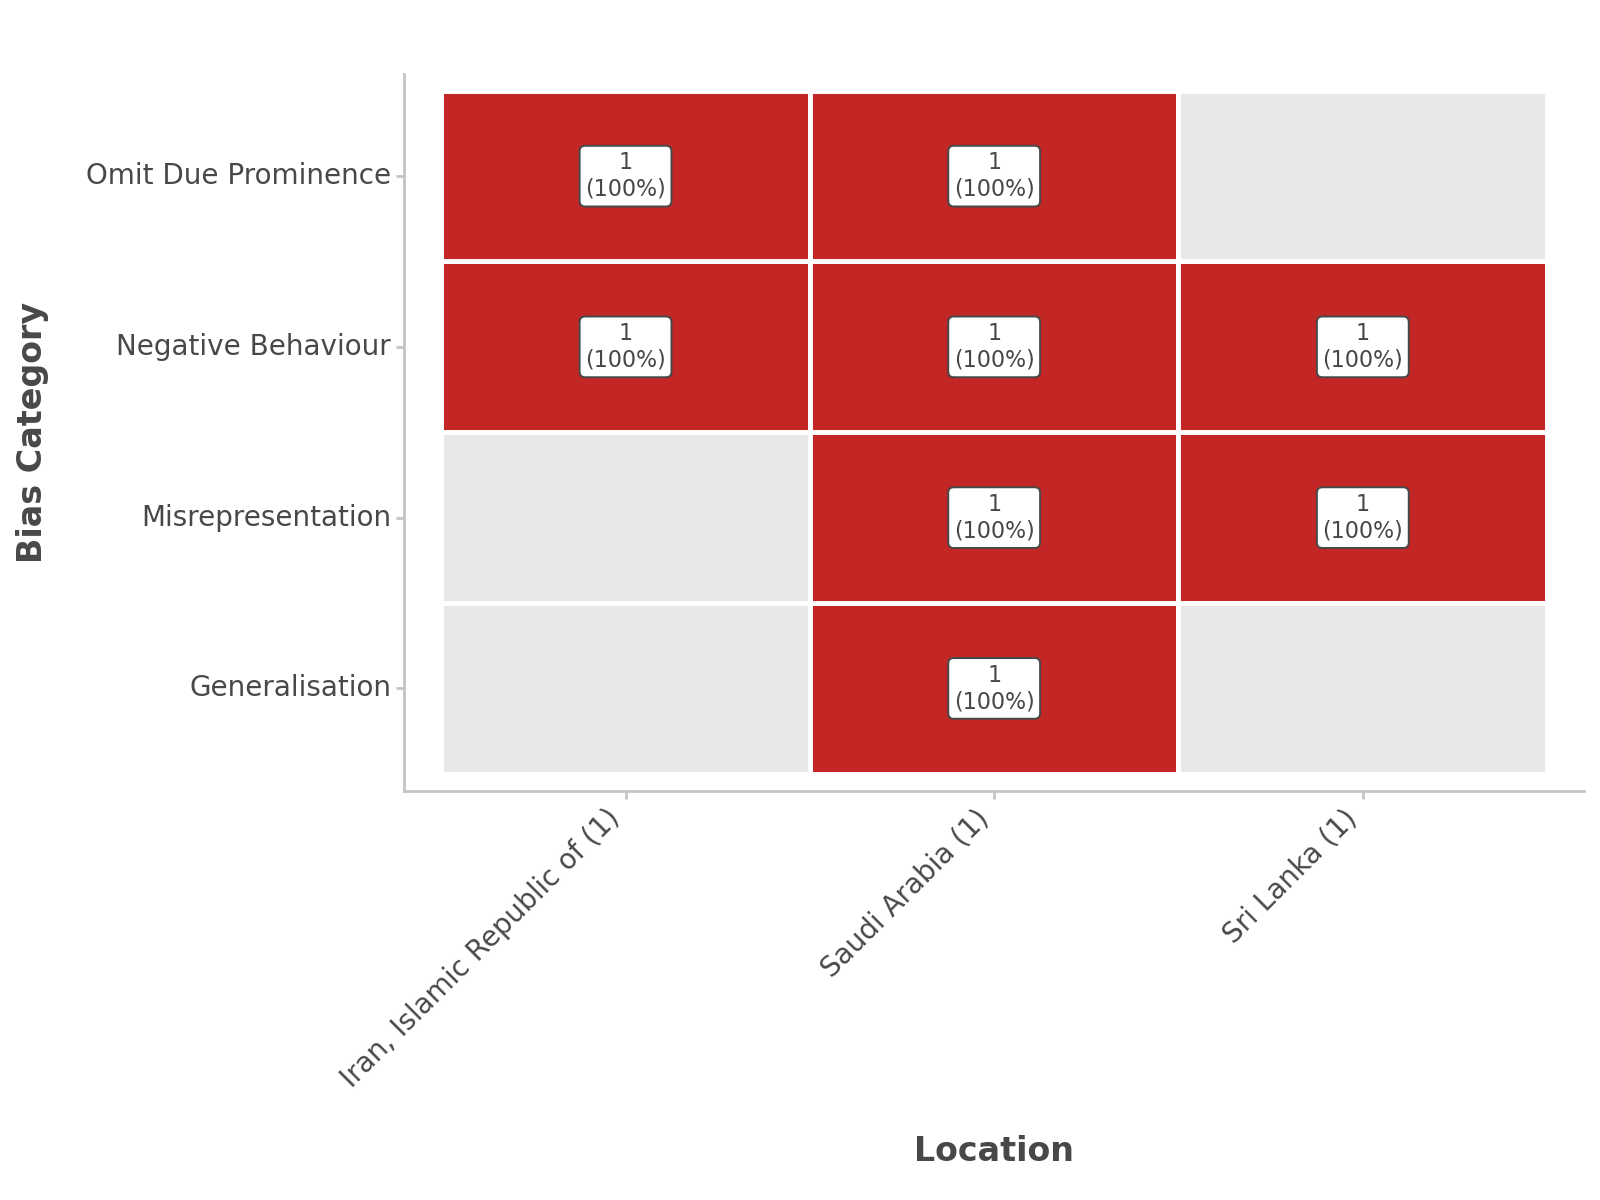

<Figure Size: (800 x 600)>

In [9]:
c1 = 'location'
c2 = 'bias_category'
data = stats.calc_2D_biased_stats(c1, c2)
chart.build_heatmap_chart(data, c1, c2)

In [10]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [11]:
c1 = 'topic'
c2 = 'bias_rating'
data = stats.calc_2D_biased_stats(c1, c2)
# chart.build_heatmap_chart(data, c1, c2)

STOPPING


/home/pdonato/_CfMM/cfmm-app/data_generator/statistics.py:158: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
/home/pdonato/_CfMM/cfmm-app/data_generator/statistics.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
data.columns

Index(['id', 'date_published', 'publisher', 'title', 'text', 'article_url',
       'topic', 'topic_list', 'location', 'main_site', 'article_url',
       'bias_rating', 'generalisation', 'prominence', 'negative_behaviour',
       'misrepresentation', 'headline_or_imagery'],
      dtype='object')

In [18]:
data[[, 'topic']]

,topic
252,"[Children and Women's Rights, Accidents and Na..."
280,"[Business and Economy, Immigration, Children a..."
300,"[Education, Religion, Hate Speech and Discrimi..."


# TEST

In [ ]:
c1 = 'bias_rating'
data = stats.calc_1D_stats(c1)
data

In [ ]:
c1 = 'bias_category'
data = stats.calc_1D_biased_stats(c1)
data

In [ ]:
res = data.set_index(c1)

if ('bias' in res.index.name) and ('rating' in res.index.name):
    name_map = {
        '-1': 'Inconclusive',
        '0': 'Not Biased',
        '1': 'Biased',
        '2': 'Very Biased',
        '1+2': 'Biased + Very Biased'
    }
    color_map = {
        'Inconclusive': '#CAC6C2',
        'Not Biased': '#f2eadf',
        'Biased': '#eb8483',
        'Very Biased': '#C22625',
        'Biased + Very Biased': '#7d2927'
    }
elif ('bias' in res.index.name) and ('cat' in res.index.name):
    name_map = {
        'generalisation': 'Generalisation',
        'headline_or_imagery': 'Headline',
        'misrepresentation': 'Misrepresentation',
        'negative_behaviour': 'Negative Behaviour',
        'prominence': 'Omit Due Prominence'
    }
    color_map = {
        'Generalisation': '#4185A0',
        'Headline': '#AA4D71',
        'Misrepresentation': '#B85C3B',
        'Negative Behaviour': '#C5BE71',
        'Omit Due Prominence': '#7658A0'
    }
else:
    name_map = dict(zip(res.columns.astype(str), res.columns.astype(str)))
    colors = ['#4185A0', '#AA4D71', '#B85C3B', '#C5BE71', '#7658A0']
    color_map = dict(zip(res.columns.astype(str), colors))


# attr
top_n = 5
show_others = True
show_inconclusive = True

display(res)

# def build_data_bar
if top_n:
    # Get top n
    res = res.sort_values('count', ascending=False).reset_index()
    res.loc[:(top_n-1), 'group'] = 'top'
    res['group'] = res['group'].fillna('Others')

    # Collapse others
    res_top = res[res['group']=='top'].drop(columns=['group'])
    res_others = res[res['group']=='Others'].groupby('group')[['count']].transform('sum').drop_duplicates()
    res_others[c1] = 'Others'

if show_others:
    res = pd.concat([res_top, res_others])
    res = res.ffill() # Fill missing B, VB, VBB article count
    if ('bias' in c1) and ('cat') in c1:
        res['pct'] = (res['count']/res['publisher_VBB']).fillna(0).multiply(100).round(1)
    else:
        res['pct'] = (res['count']/res['count'].sum()).fillna(0).multiply(100).round(1)
   
    res = res.set_index(c1)
else:
    res = res_top
    if ('bias' in c1) and ('cat') in c1:
        res['pct'] = (res['count']/res['publisher_VBB']).fillna(0).multiply(100).round(1)
    else:
        res['pct'] = (res['count']/res['count'].sum()).fillna(0).multiply(100).round(1)
    res = res.set_index(c1)

if not show_inconclusive:
    if 'Inconclusive' in res.index.astype(str).map(name_map):
        ind = list(res.index.astype(str).map(name_map)).index('Inconclusive')
        res = res.drop(columns=res.columns[ind])

# Attach plot prerequisites
res['name'] = res.index.astype(str).map(name_map).fillna('Others')
res['name'] = pd.Categorical(values=res['name'], categories=['Others'] + list(name_map.values()), ordered=True)
res['color'] = res['name'].astype(str).map(color_map).fillna('#e8e8e8')
res['label'] = res['pct'].astype(int).astype(str) + '%'
res['label'] = res['count'].astype(str) + ' (' + res['label'] + ')'

res

In [ ]:
(ggplot(res)
        + geom_bar(aes(x='name', y='count', fill='name'), stat='identity', width=0.60, show_legend=False)
        + geom_label(aes(x='name', y='count', label='label'), color="#474948", ha='center', size=10, show_legend=False)
        + scale_fill_manual(values=dict(zip(res['name'], res['color'])))
        # + scale_y_continuous(limits=(0, res['count'].max()*1.10), labels=comma_format())
        + scale_y_continuous(limits=(0, res['count'].max()*1.10), labels=lambda l: ["%d" % int(v) for v in l])
        + ylab('Number of Articles')
        + xlab(c1.replace('_', ' ').title())
        + coord_flip()
        )

In [ ]:
c1 = 'bias_category'
data = stats.calc_1D_stats(c1)
chart.build_bar_chart(data, c1)